### House Sales Price Prediction using multi variable linear model

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score

In [2]:
ds=pd.read_csv('kc_house_data.csv')

In [3]:
ds.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
ds.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0, 0.5, 'Total count')

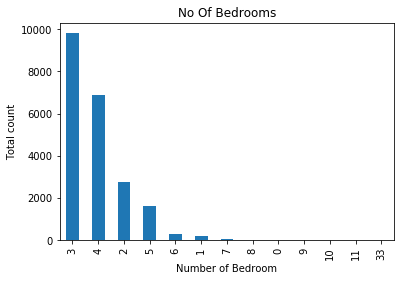

In [5]:
ds['bedrooms'].value_counts().plot(kind='bar')
plt.title('No Of Bedrooms')
plt.xlabel('Number of Bedroom')
plt.ylabel('Total count')


Text(0, 0.5, 'Price')

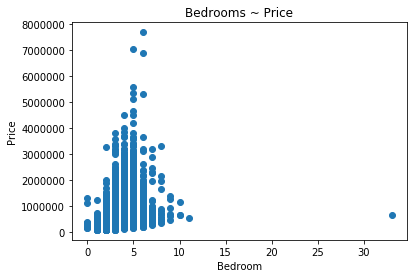

In [6]:
plt.scatter(ds['bedrooms'],ds['price'])
plt.title('Bedrooms ~ Price')
plt.xlabel('Bedroom')
plt.ylabel('Price')

Text(0, 0.5, 'Sqft_living')

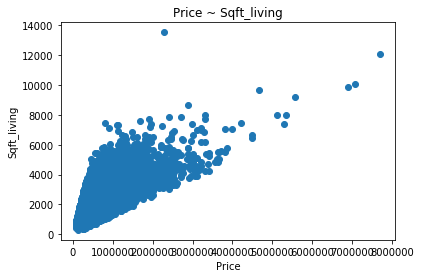

In [7]:
plt.scatter(ds['price'],ds['sqft_living'])
plt.title('Price ~ Sqft_living')
plt.xlabel('Price')
plt.ylabel('Sqft_living')

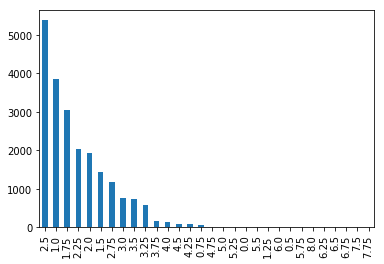

In [8]:
ds['bathrooms'].value_counts().plot(kind='bar')

### Correlation Check

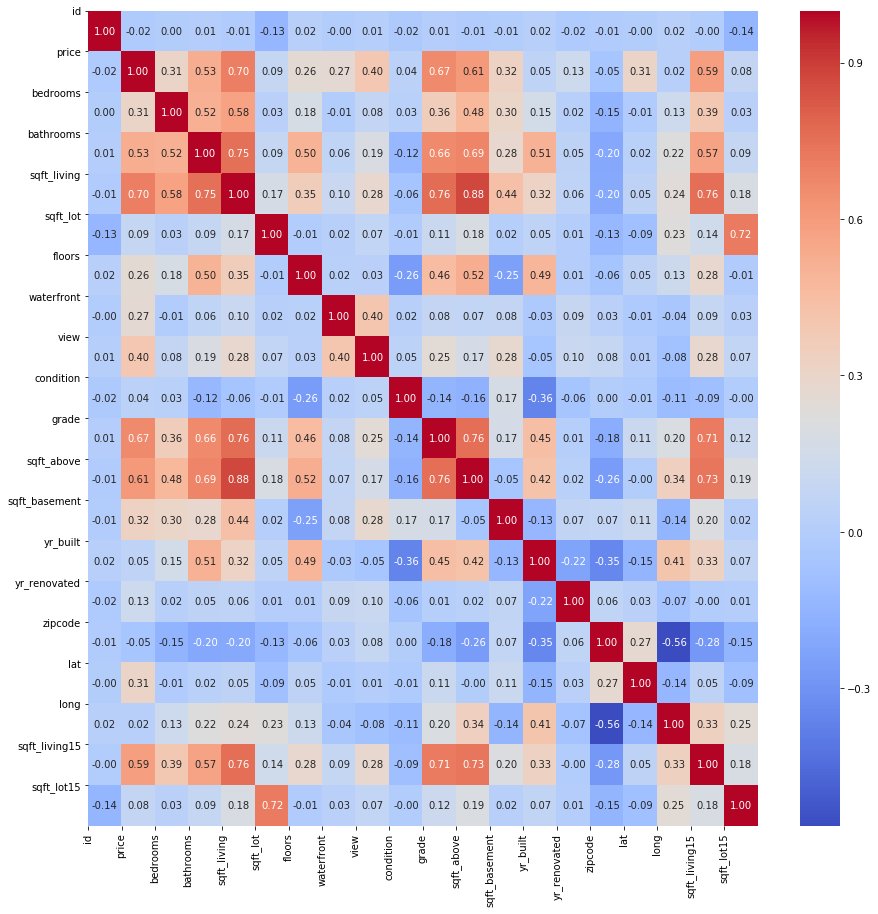

In [9]:
#Create Correlation df
corr=ds.corr()
#Plot figsize
fig,ax=plt.subplots(figsize=(15,15))

 #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f")    


#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()


### Identify Highly Correlated Features

In [10]:
# Create correlation matrix
corr_matrix = ds.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)

['sqft_living', 'grade', 'sqft_above', 'sqft_living15']


### Separate Dependent and Independent Features

In [11]:
X=ds.drop(['id','price', 'sqft_above', 'sqft_living15', 'sqft_lot15'],axis=1)

In [12]:
conv_dates = [1 if values == 2014 else 0 for values in X.date ]
X['date'] = conv_dates

In [13]:
X.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045


In [14]:
y=ds['price']

In [15]:
type(y)

pandas.core.series.Series

In [16]:
type(X)

pandas.core.frame.DataFrame

### Separate Train and Test Values

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

### Create Object of LinearRegression Model

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Accuracy of Model

In [20]:
lr.score(X_test,y_test)

0.7054554319904108

### Prediction with unknow dataset

In [21]:
y_predict=lr.predict(X_test)

In [22]:
type(y_predict)

numpy.ndarray

In [23]:
y_new_test=pd.DataFrame(y_test)

In [24]:
y_new_predict=pd.DataFrame(y_predict)

In [25]:
type(y_new_predict)

pandas.core.frame.DataFrame

In [26]:
type(y_new_test)

pandas.core.frame.DataFrame

In [27]:
y_new_predict=y_new_predict.reset_index(drop=True)

In [28]:
Compare_test_predict = pd.concat([y_new_test, y_new_predict], axis=1)

In [29]:
Compare_test_predict

,price,0
0,221900.0,3.715927e+05
1,NaN,5.642833e+05
2,NaN,-5.632363e+05
3,NaN,4.300177e+05
4,NaN,4.417567e+05
5,NaN,1.019998e+05
6,NaN,5.673327e+05
7,291850.0,3.669367e+05
8,NaN,4.048392e+05
9,323000.0,1.512185e+06
